## About

This notebook will produce Ramachandran plots and phi/psi timetraces for all residues along the backbone of a peptide.

## Inputs

PDB is the starting structure, gives topological info (pdb)

TRAJ is the dynamics trajectory (dcd)

In [140]:
PDB = "pdbs_equilibrated/aaa_amber.pdb"
TRAJ = "outputs/production_aaa_amber_amber_160126_260122/production_output.dcd"

## Analysis

This may take a few minutes depending on the length of traj and number of atoms

In [141]:
import MDAnalysis as mda
from MDAnalysis.analysis.dihedrals import Ramachandran
import matplotlib.pyplot as plt
import time
from datetime import timedelta
import os.path

u = mda.Universe(PDB, TRAJ)
r = u.select_atoms("backbone")

num_res_pairs = len(r.residues) - 1
res_idxs = ((i, i+2) for i in range(num_res_pairs))
angles = (r.residues[i:j] for i,j in res_idxs)

print(f"Starting...")
time_start = time.time()
Rs = []
for i, angle in enumerate(angles):
    print(f"Running residue pair {i} of {num_res_pairs}...")
    Rs.append(Ramachandran(angle).run())
dt = time.time()-time_start
print(f"Done, took {timedelta(seconds=dt)} total")

Starting...
Running residue pair 0 of 2...


/home/mbowley/miniconda3/envs/ani/lib/python3.9/site-packages/MDAnalysis/analysis/dihedrals.py:421: UserWarning: Cannot determine phi and psi angles for the first or last residues
  warnings.warn("Cannot determine phi and psi angles for the first "


Running residue pair 1 of 2...
Done, took 0:02:13.742532 total


## Ramachandran and Timetrace Plots

Can fiddle with `alpha` and `s` to better display data

/home/mbowley/miniconda3/envs/ani/lib/python3.9/site-packages/MDAnalysis/analysis/dihedrals.py:527: DeprecationWarning: The `angle` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.angles` instead
  warnings.warn(wmsg, DeprecationWarning)
/home/mbowley/miniconda3/envs/ani/lib/python3.9/site-packages/MDAnalysis/analysis/dihedrals.py:527: DeprecationWarning: The `angle` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.angles` instead
  warnings.warn(wmsg, DeprecationWarning)
/home/mbowley/miniconda3/envs/ani/lib/python3.9/site-packages/MDAnalysis/analysis/dihedrals.py:527: DeprecationWarning: The `angle` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.angles` instead
  warnings.warn(wmsg, DeprecationWarning)
/home/mbowley/miniconda3/envs/ani/lib/python3.9/site-packages/MDAnalysis/analysis/dihedrals.py:527: DeprecationW

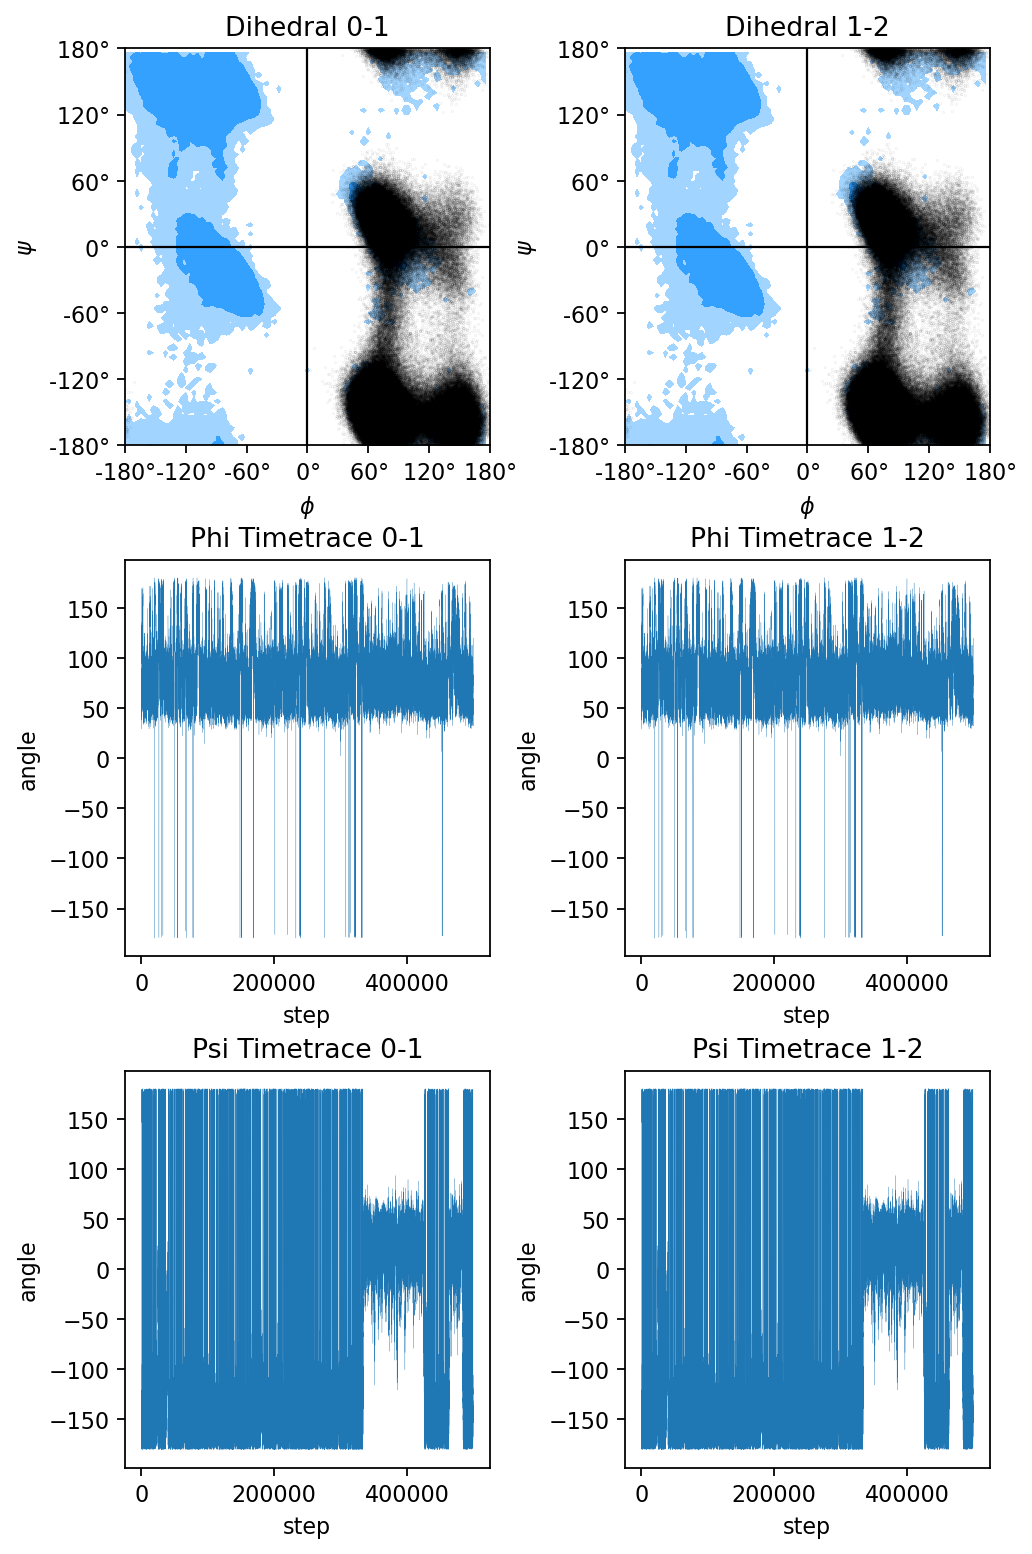

In [145]:
fig, axs = plt.subplots(3, num_res_pairs, figsize=plt.figaspect(3/num_res_pairs), dpi=160)
fig.tight_layout(pad=3)

# for ax in fig.get_axes():
#     ax.label_outer()

ramachandran_plot_args = {
    "color": 'black', 
    "alpha": 0.5, 
    "marker": ".", 
    "s": (1/fig.dpi), 
    "ref": True # Set to false to hide blue reference heatmap of ramachandran plot
}

for i, R in enumerate(Rs):
    # Plot Ramachandran
    axs[0, i].set_title(f'Dihedral {i}-{i+1}')
    R.plot(ax=axs[0, i], **ramachandran_plot_args)

    # Plot Phi and Psi
    for j, name in enumerate(("Phi", "Psi")):
        ax = axs[j+1, i]
        ax.set_title(f'{name} Timetrace {i}-{i+1}')
        ax.set(xlabel='step', ylabel='angle')
        ax.plot(R.angles[:, 0, j], linewidth=0.1)

savename = os.path.splitext(os.path.basename(PDB))[0]
savename = f"ramachandran_{savename}"
fig.patch.set_facecolor("white")
plt.savefig(f'{savename}.png')
plt.savefig(f'{savename}.pdf')